# Исследовательский проект 
Данный проект направлен на исследование различных факторов, влияющих на "усыновление" животных из приюта  
Основным инструментом для исследования является библиотека pandas

## Задачи и цели проекта

1. Рассмотреть массив данных, подготовить его к исследованию
2. Провести анализ и выявить факторы, влияющие на возможность усыновления животного
3. Сделать выводы и дать возможную рекомендацию приютам

## Исходные данные

В качестве исходных данных используется массив данных, в котором собраны различные данные о животных

In [1]:
# Подключаем библиотеки
import pandas as pd
import matplotlib.pyplot as plt

__PetID__: Уникальный идентификатор для каждого питомца.  
__PetType__: Тип питомца.  
__Breed__: Порода.  
__AgeMonths__: Возраст в месяцах.  
__Color__: Цвет животного.  
__Size__: Размер.  
__WeightKg__: Вес в килограммах.  
__Vaccinated__: Сведения о вакцинации (0 - Не вакцинирован, 1 - Вакцинирован).  
__HealthCondition__: Состояние здоровья (0 - Здоров, 1 - Медицинский уход).  
__TimeInShelterDays__: Длительность пребывания в приюте.  
__AdoptionFee__: Цена усыновления.  
__PreviousOwner__: Был ли когда нибудь хозяин (0 - Нет, 1 - Да).  
__AdoptionLikelihood__: Шансы на усыновления (0 - Низкие, 1 - Высокие).  

In [2]:
# запишем исходные данные в dataframe
data = pd.read_csv('pet_adoption_data.csv',sep=',')
# проверим правильность записи
display(data.head())

,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,500,Bird,Parakeet,103,Black,Large,16.357608,1,0,43,335,0,0
1,501,Rabbit,Labrador,8,Black,Medium,12.625582,0,0,50,93,0,1
2,502,Dog,Parakeet,153,Gray,Small,9.624407,0,0,3,79,0,0
3,503,Bird,Golden Retriever,91,Gray,Medium,20.770021,0,0,59,37,1,0
4,504,Bird,Golden Retriever,174,Gray,Medium,7.025923,1,0,28,407,0,1


Видно, что у данных есть проблемы в столбце с типом животного  
Необходимо в дальнейшем корректировать данный стобец на основе породы

## Предобработка данных

### Корекция типа животного

In [3]:
data['Breed'].unique()

array(['Parakeet', 'Labrador', 'Golden Retriever', 'Poodle', 'Persian',
       'Siamese'], dtype=object)

In [4]:
def pet_type(a):
    if a in ['Labrador','Golden Retriever','Poodle']:
        return('Dog')
    elif a == 'Parakeet':
        return('Bird')
    else:
        return('Cat')

data['PetType'] = data['Breed'].apply(pet_type)
display(data.head())        

,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,500,Bird,Parakeet,103,Black,Large,16.357608,1,0,43,335,0,0
1,501,Dog,Labrador,8,Black,Medium,12.625582,0,0,50,93,0,1
2,502,Bird,Parakeet,153,Gray,Small,9.624407,0,0,3,79,0,0
3,503,Dog,Golden Retriever,91,Gray,Medium,20.770021,0,0,59,37,1,0
4,504,Dog,Golden Retriever,174,Gray,Medium,7.025923,1,0,28,407,0,1


Исправили тип животного

### Типы данных

In [5]:
# проверим типы данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2007 entries, 0 to 2006
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PetID               2007 non-null   int64  
 1   PetType             2007 non-null   object 
 2   Breed               2007 non-null   object 
 3   AgeMonths           2007 non-null   int64  
 4   Color               2007 non-null   object 
 5   Size                2007 non-null   object 
 6   WeightKg            2007 non-null   float64
 7   Vaccinated          2007 non-null   int64  
 8   HealthCondition     2007 non-null   int64  
 9   TimeInShelterDays   2007 non-null   int64  
 10  AdoptionFee         2007 non-null   int64  
 11  PreviousOwner       2007 non-null   int64  
 12  AdoptionLikelihood  2007 non-null   int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 204.0+ KB


Данные имеют походящие типы данных

### Дубликаты

In [6]:
# Проверка на явные дубликаты
data.duplicated().sum()

0

Явных дубликатов не обнаружено

### Возраст

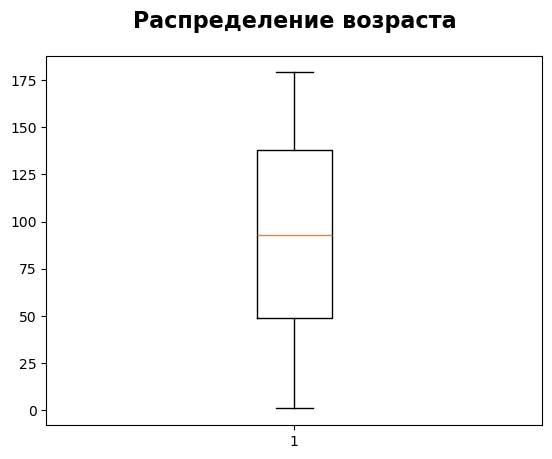

In [7]:
# Воспользуемся функцией boxplot
plt.boxplot(data['AgeMonths'])
plt.title('Распределение возраста', fontsize=16,
                  fontweight='bold', pad=20);

Идеальное нормальное распределение

### Вес

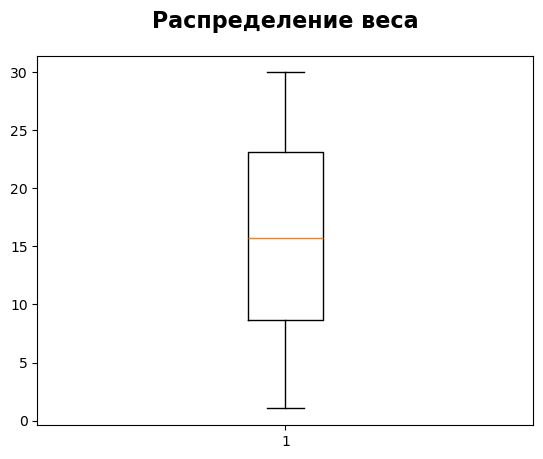

In [8]:
# Воспользуемся функцией boxplot
plt.boxplot(data['WeightKg'])
plt.title('Распределение веса', fontsize=16,
                  fontweight='bold', pad=20);

Идеальное нормальное распределение

### Длительность пребывания в приюте

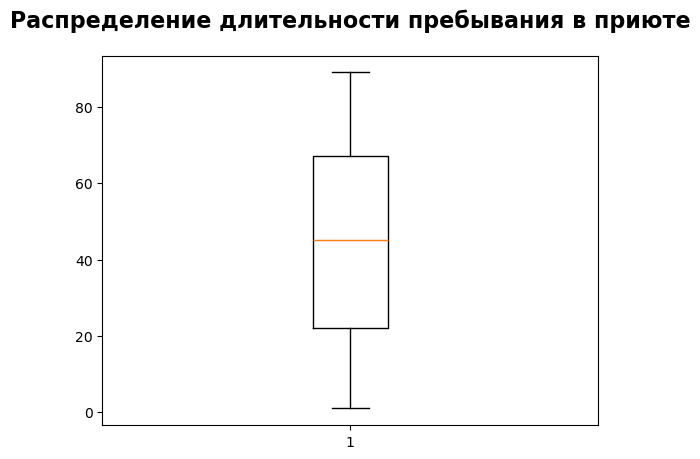

In [9]:
# Воспользуемся функцией boxplot
plt.boxplot(data['TimeInShelterDays'])
plt.title('Распределение длительности пребывания в приюте', fontsize=16,
                  fontweight='bold', pad=20);

Идеальное нормальное распределение

### Замена значений в бинарных стобцах

In [10]:
def recall_v(a):
    if a == 1:
        return ('Вакцинирован')
    else:
        return ('Не вакцинирован')

def recall_m(a):
    if a == 1:
        return ('Нуждается в уходе')
    else:
        return ('Не нуждается')

def recall_h(a):
    if a == 1:
        return ('Был хозяин')
    else:
        return ('Хозяина не было')

data['Vaccinated'] = data['Vaccinated'].apply(recall_v)
data['HealthCondition'] = data['HealthCondition'].apply(recall_m)
data['PreviousOwner'] = data['PreviousOwner'].apply(recall_h)


## Анализ данных

В данной части мы найдем всевозможные зависимости удачи усыновления (AdoptionLikelihood) от различных факторов

In [11]:
def analysis_pet(index,xlabel,ylabel='Вероятность усыновления,%',data=data,rot=False):
    # Создадим свобную таблицу с индексами в качестве типа животного и значениями
    data_pet_type = data.pivot_table(index=index, values='AdoptionLikelihood'
                                     ,aggfunc=(lambda x: round(sum(x)*100/len(x),2))).reset_index().sort_values(by='AdoptionLikelihood', ascending=False)
    
    well_name = max(data_pet_type['AdoptionLikelihood'])
    highlight_colour = '#d95f02'
    non_highlight_colour = '#768493'
    
    data_pet_type['colors'] = data_pet_type['AdoptionLikelihood'].apply(lambda x: highlight_colour if x == well_name else non_highlight_colour)
    
    # Строим график
    plot = plt.barh(data_pet_type[index],data_pet_type['AdoptionLikelihood'],align='center', 
                    height=0.7, color=data_pet_type['colors']) # A bar chart
    plt.ylabel(xlabel)
    plt.xlabel(ylabel)
    plt.bar_label(plot,padding=-35,color='white')
    plt.title('Зависимость от параметра {xlabel}'.format(xlabel=xlabel), fontsize=16,
                  fontweight='bold', pad=20)
    # plt.grid(True)
    plt.show()


### Зависимость от типа животного

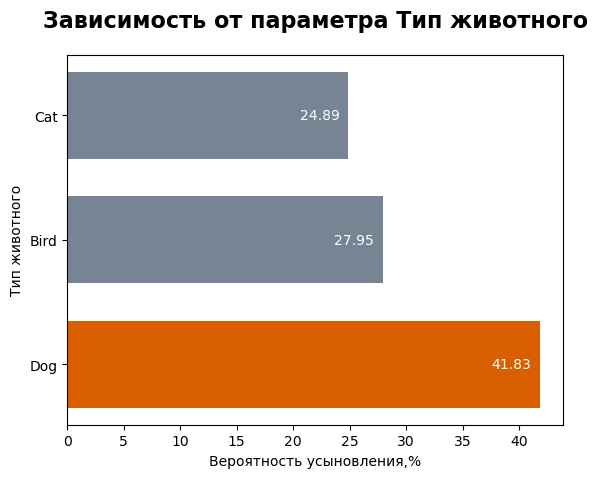

In [12]:
analysis_pet('PetType','Тип животного')

Больше шансов на усыновления у собак  
Рассмотрим породы для более точной картины

### Зависимость от породы

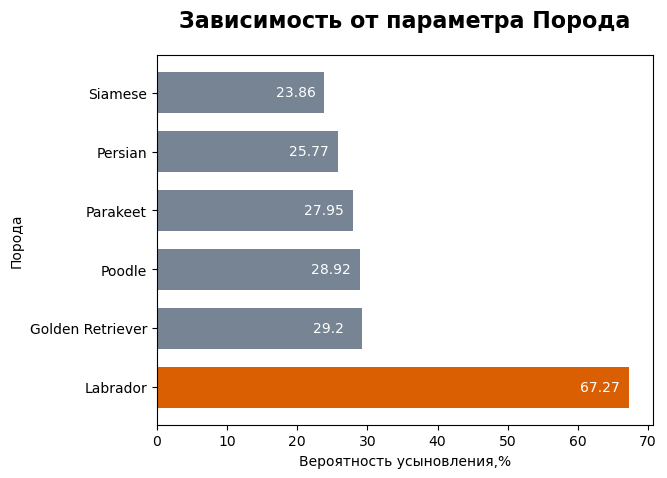

In [13]:
analysis_pet('Breed','Порода',rot=True)

Статистика благоволит собакам только из за __лабрадоров__ 

### Зависимость от возраста

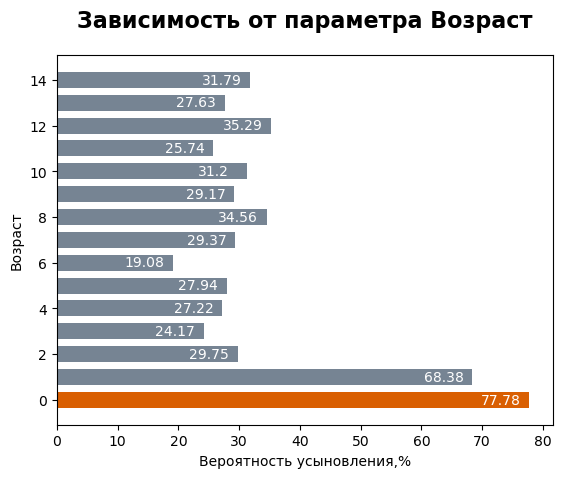

In [14]:
# Добавим новый стобец в таблицу с количеством полных лет
data['AgeYears'] = (data['AgeMonths']/12).astype(int)

analysis_pet('AgeYears','Возраст',rot=True)

Как видно из распределения, в основном шансов больше у совсем молодых животных  
Радует то, что с возрастом (после 2 лет) шансы на усыновление практически не снижаются

### Зависимость от окраса

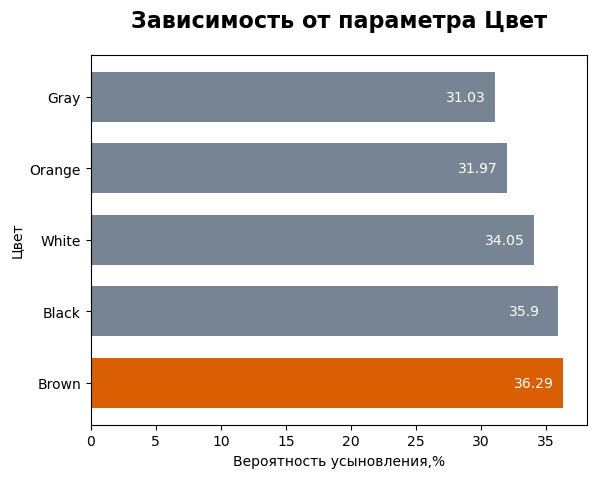

In [15]:
analysis_pet('Color','Цвет',rot=True)

Цвет не так сильно влияет на шансы усыновления, но коричневый все равно идет впереди

### Зависимость от размера

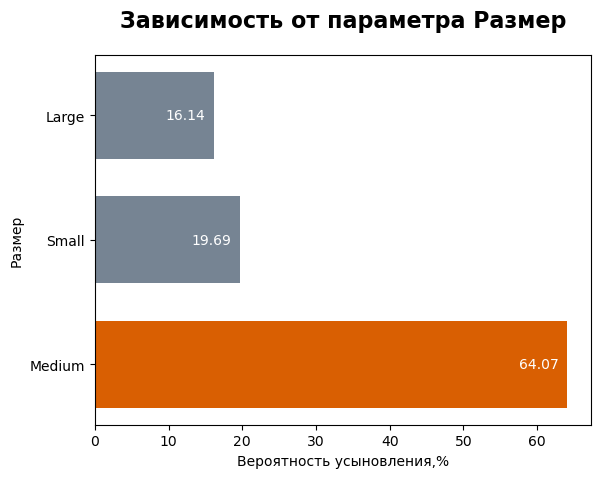

In [16]:
analysis_pet('Size','Размер')

Животные среднего размер в 3 раза чаще усыновляются

### Зависимость от веса

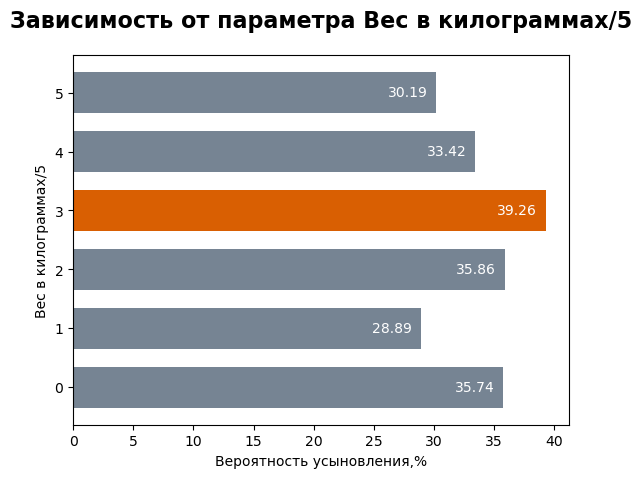

In [17]:
# Приведем вес  к типу int
data['WeightKg'] = (data['WeightKg']/5).astype('int')

analysis_pet('WeightKg','Вес в килограммах/5',rot=True)

Вес практически не влияет на шансы усыновления

### Зависимость от вакцинации

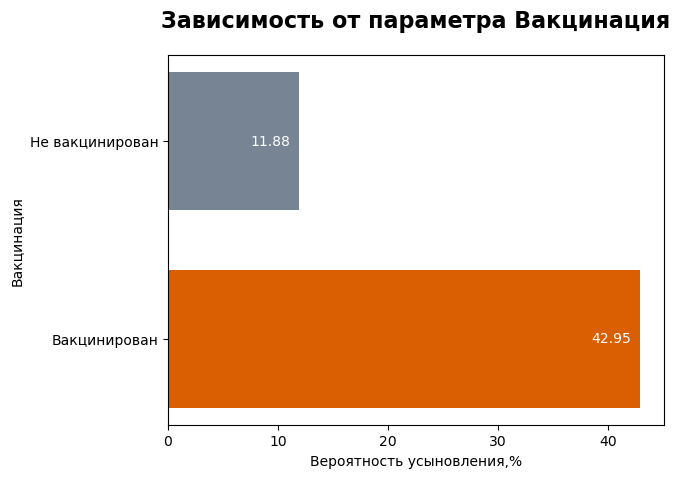

In [18]:
analysis_pet('Vaccinated','Вакцинация')

Животных с вакциной забирают намного (в 4 раза) чаще

### Зависимость от мед.обслуживания

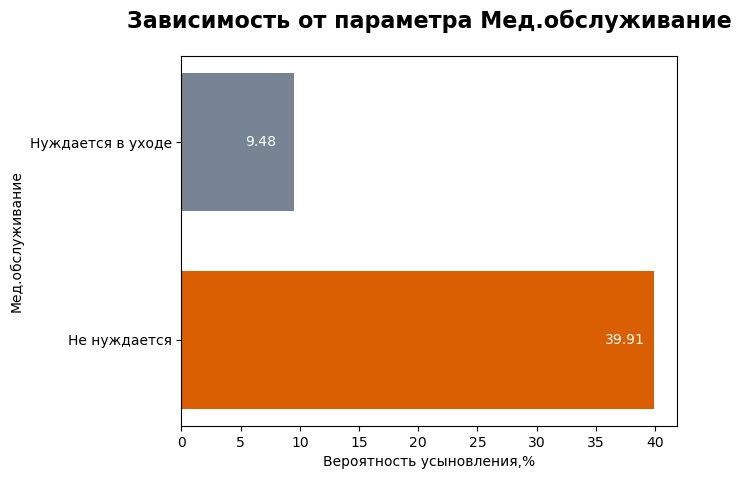

In [19]:
analysis_pet('HealthCondition','Мед.обслуживание')

Животных без необходиости в медицинском обслуживании( без проблем со здоровьем) забирают в 4 раза чаще

### Зависимость от длительности проживания в приюте

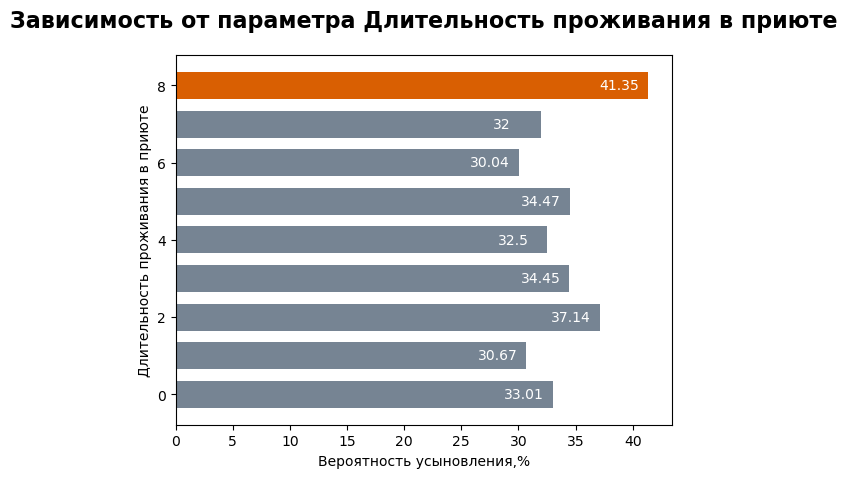

In [20]:
data['TimeInShelterDays'] = (data['TimeInShelterDays']/10).astype(int)
analysis_pet('TimeInShelterDays','Длительность проживания в приюте')

Длительность проживания в приюте практически не влияет на шансы скоро уезда из него

### Зависимость от стоимости усыновления

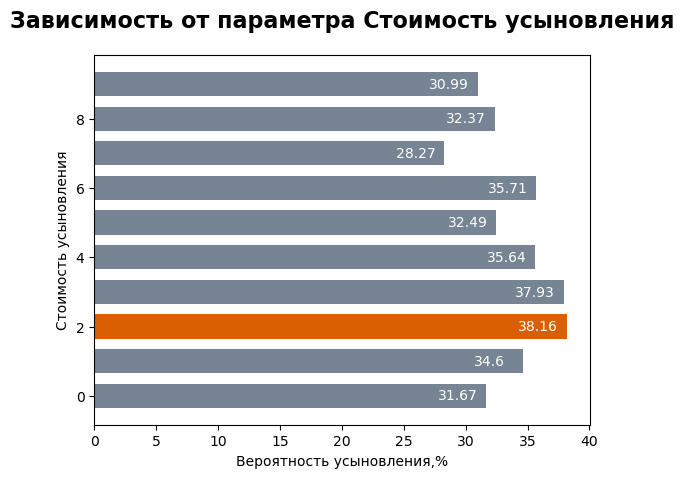

In [21]:
data['AdoptionFee'] = (data['AdoptionFee']/50).astype(int)
analysis_pet('AdoptionFee','Стоимость усыновления')

Есть небольшая зависимость от цены усыновления - чем дешевле животное, тем больше вероятность усыновления но данная зависимость выражена не так ярко

### Зависимость от наличия предыдущего хозяина

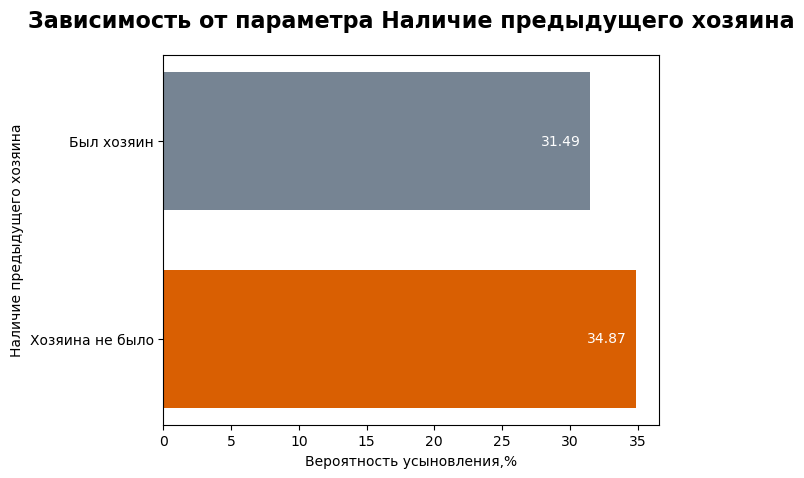

In [22]:
analysis_pet('PreviousOwner','Наличие предыдущего хозяина')

Как ни странно, но наличие прошлого хозяина не влияет на будущее животного

## Вывод

У животного больше всего шансов на усыновление, если оно:
1. Собака, а конкретно - лабрадор
2. В возрасте до 2 лет
3. Среднего размера
4. Привитая
5. Без проблем со здоровьем
   *** 
Из этого списка работники приюта могут выполнить только одно(чем они и занимаются) - прививать животных!